In [1]:
from image_deep_dream.deep_dream import DeepDream
import IPython.display as display
import librosa.display
from librosa.feature import melspectrogram
from librosa.feature.inverse import mel_to_audio
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import Tensor
from typing import List
from utils.displays import display_audio_player, display_image
from utils.converters import open_image_as_np_array
import utils.constants as consts

PATH_TO_AUDIO: str = '../audio-files'
PATH_TO_IMAGES: str = '../images'

In [2]:
sample, _ = librosa.load(f'{PATH_TO_AUDIO}/mandolin.wav', mono=True)  # type: np.ndarray, int

display_audio_player(sample)

##### Encode audio into spectrogram and save it as an image.

In [3]:
encoded_sample: np.ndarray = melspectrogram(
    sample,
    sr=consts.SAMPLE_RATE,
    n_fft=consts.NUM_FFT,
    hop_length=consts.MEL_HOP_LEN,
    n_mels=consts.NUM_MELS
)

# Save Mel-Spectrogram as image.
PATH_TO_PRE_DREAM_SPEC: str = f'{PATH_TO_IMAGES}/mandolin_spectrogram.png'
spec_as_image: Image = Image.fromarray(encoded_sample).convert('L')
spec_as_image.save(PATH_TO_PRE_DREAM_SPEC)

###### Load image back in for DeepDreamification

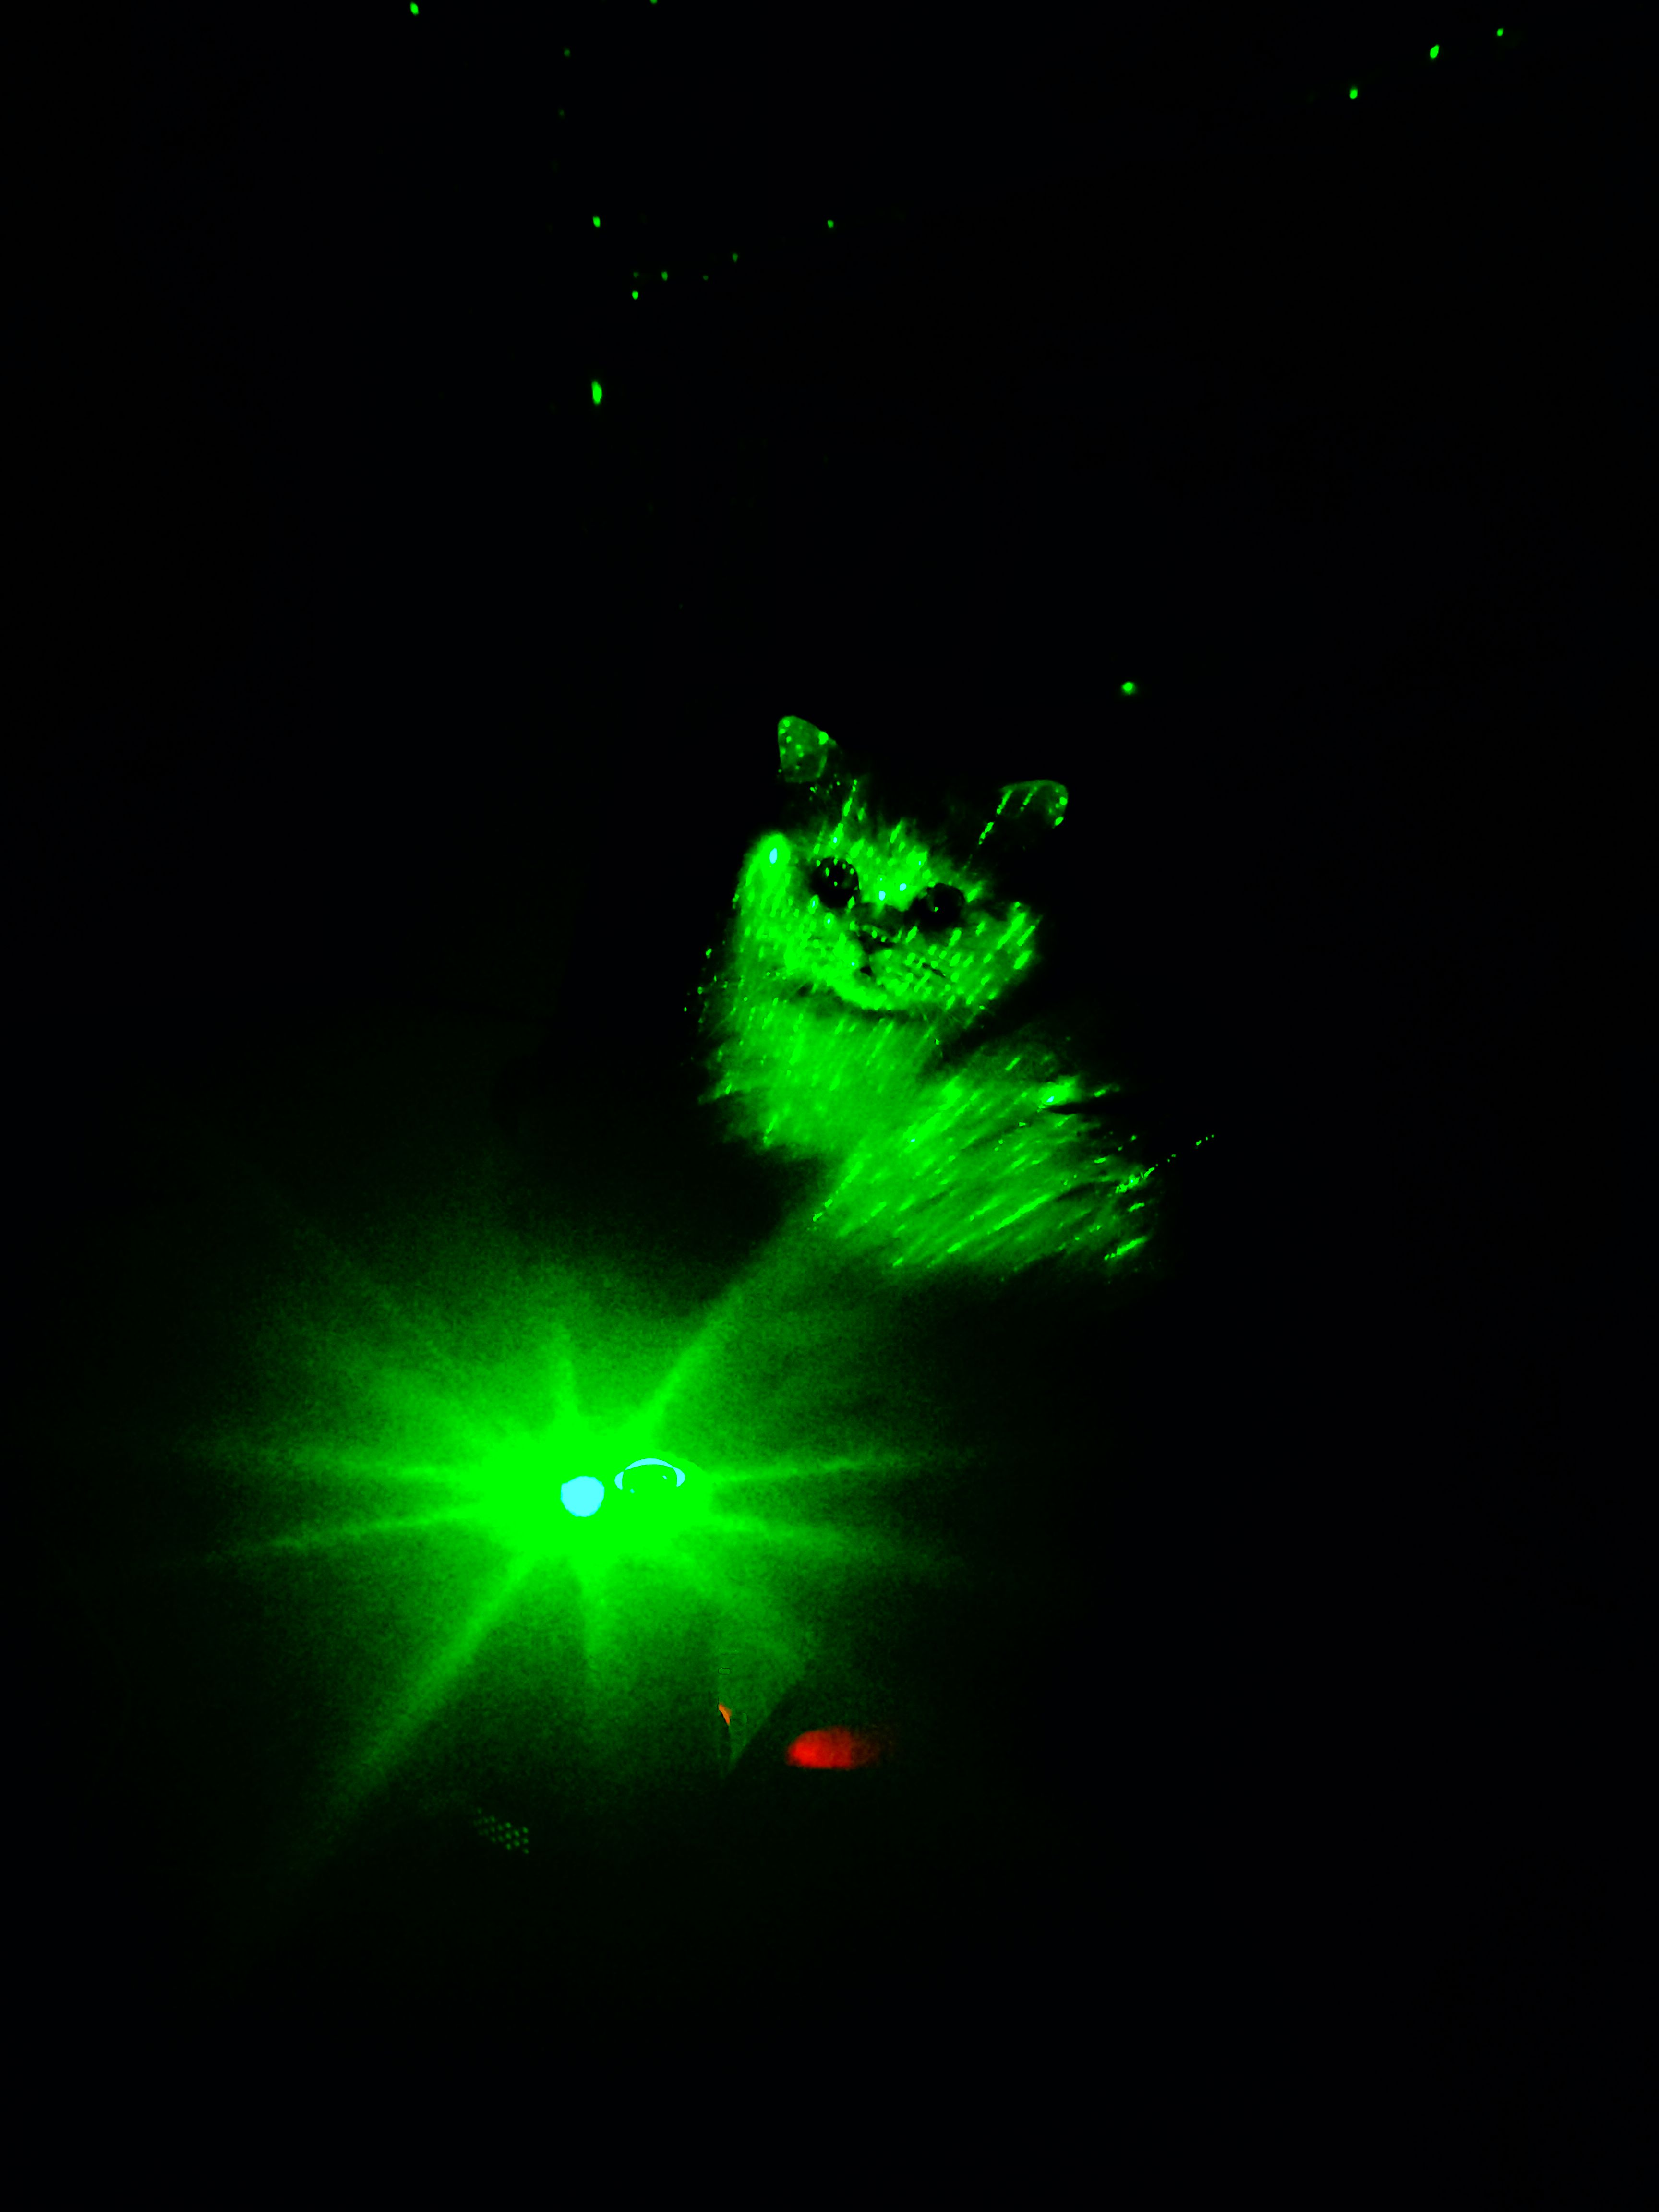

In [18]:
# Downsizing the image makes it easier to work with.
original_img: np.array = open_image_as_np_array(f'../images/mazzy.png')
base_shape: Tensor = tf.shape(original_img)[:-1]  # Original size of image shape, used to resize final deepdream.

display_image(original_img)

##### DreamDream image

In [19]:
# Maximize the activations of these layers.
layer_names: List[str] = [
    'mixed9',
    'mixed0'
]

tiled_gradients = DeepDream(layer_names)

# Change settings below to achieve different results.
image: Tensor = tiled_gradients.run_deep_dream(
    _img=original_img,
    steps_per_octave=2,
    step_size=0.01,
    octaves=range(-2, 5),
    octave_scale=1.3,
)

# Clear anything that might have been draw such as warnings.
display.clear_output(wait=True)

image = tf.image.resize(image, base_shape)  # Resize image to original image size.
image = tf.image.convert_image_dtype(image / 255.0, dtype=tf.uint8)

display_image(image)


ResourceExhaustedError: 2 root error(s) found.
  (0) Resource exhausted:  OOM when allocating tensor with shape[10123,7592,3] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node while/body/_17/while/while/body/_2155/gradient_tape/while/while/strided_slice/StridedSliceGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

	 [[while/body/_17/while/while/LoopCond/_2684/_44]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

  (1) Resource exhausted:  OOM when allocating tensor with shape[10123,7592,3] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node while/body/_17/while/while/body/_2155/gradient_tape/while/while/strided_slice/StridedSliceGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

0 successful operations.
0 derived errors ignored. [Op:__inference___call___51495]

Function call stack:
__call__ -> __call__


In [ ]:
# deep_dreamed_image: np.ndarray = open_image_as_np_array(f'{PATH_TO_IMAGES}/mandolin_spectrogram.tiff')
# deep_dreamed_wav: np.ndarray = mel_to_audio(deep_dreamed_image)
#
# display_audio_player(deep_dreamed_wav)